# Spotify Churn Analysis and Prediction

## 1. Intorduction

- Spotify is a digital music, podcast, and audiobook streaming service that allows users to listen to millions of content from creators worldwide. Spotify offers two user options based on features: Spotify Free and Spotify Premium. Spotify Premium offers additional features such as offline listening and ad-free access.
- Customers who initially subscribed to Spotify Premium can cancel their subscription and switch to Spotify Free. This transition process is crucial for understanding why customers churn and improving Spotify's service.
- This project will analyze the churn rate, defined as the percentage of customers who stop using a service. Based on this rate, the reasons for customer churn are identified. So that ways can be determined to improve services to avoid churn.

## 2. Load Dataset and Data Undestanding 

Import the pandas library to read the dataset in csv format and insert it into the df (dataframe) variable.

In [1]:
import pandas as pd

df = pd.read_csv('spotify_churn_dataset.csv')

Display the first 10 data of the dataset

In [2]:
df.head(10)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
5,6,Female,17,AU,Free,219,35,0.46,Desktop,13,0,0
6,7,Female,39,UK,Premium,289,44,0.38,Desktop,0,1,0
7,8,Female,41,UK,Free,210,68,0.11,Mobile,5,0,0
8,9,Other,55,DE,Student,50,66,0.29,Web,0,1,0
9,10,Male,44,DE,Free,278,94,0.38,Mobile,44,0,0


Display dataframe information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [5]:
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


Check for null data in a dataframe

In [6]:
df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

Chech for multiple data in a dataframe

In [7]:
df.duplicated().sum()

0

## 3. Data Cleaning & Data Processing

Encoding of categorical columns country, subscription_type, device_type, and gender

In [8]:
from sklearn.preprocessing import OneHotEncoder

device_mapping = {'Mobile': 0, 'Web': 1, 'Desktop': 2}
df['device_type_encoded'] = df['device_type'].map(device_mapping)

gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender_type_encoded'] = df['gender'].map(gender_mapping)

subscription_mapping = {'Free': 0, 'Student': 1, 'Family': 2, 'Premium': 3}
df['subscription_type_encoded'] = df['subscription_type'].map(subscription_mapping)

df['country_encoded'] = df['country'].map(df['country'].value_counts())

In [9]:
df.head(10)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,device_type_encoded,gender_type_encoded,subscription_type_encoded,country_encoded
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1,2,0,0,954
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0,1,2,2,1015
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1,0,1,3,1034
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0,0,0,1,954
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1,0,2,2,1032
5,6,Female,17,AU,Free,219,35,0.46,Desktop,13,0,0,2,0,0,1034
6,7,Female,39,UK,Premium,289,44,0.38,Desktop,0,1,0,2,0,3,966
7,8,Female,41,UK,Free,210,68,0.11,Mobile,5,0,0,0,0,0,966
8,9,Other,55,DE,Student,50,66,0.29,Web,0,1,0,1,2,1,1015
9,10,Male,44,DE,Free,278,94,0.38,Mobile,44,0,0,0,1,0,1015


## 4. Exploratory Data Analysis (EDA)

Calculate churn percentage and visualize it on a pie chart

In [10]:
churn_counts = df['is_churned'].value_counts()

churn_percentage = df['is_churned'].value_counts(normalize=True) * 100

print("Churn Counts:")
print(churn_counts)
print("\nChurn Percentage:")
print(churn_percentage.round(2))

Churn Counts:
is_churned
0    5929
1    2071
Name: count, dtype: int64

Churn Percentage:
is_churned
0    74.11
1    25.89
Name: proportion, dtype: float64


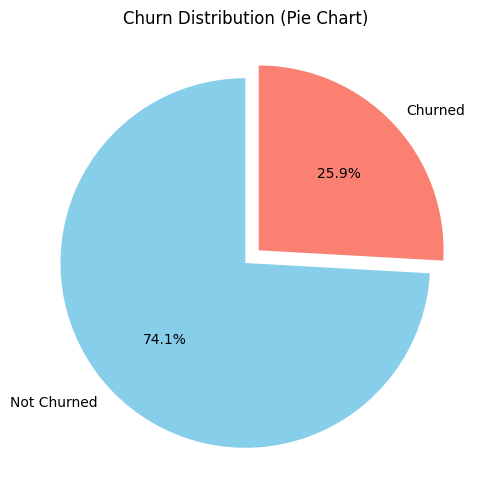

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode=(0,0.1))
plt.title("Churn Distribution (Pie Chart)")
plt.show()

The calculation above shows that out of 8,000 users, 5,929 are loyal Spotify subscribers, and 2,071 users have switched to the free version. This result indicates that 25.89% of users have switched to the free version. This indicates that many users are canceling their subscriptions, which could impact the company's revenue.

observing the distribution of the features age, listening_time, song_played_per_day, skip_rate, ads_listened_per_week, country, gender, subscription_type, and offline_listening.

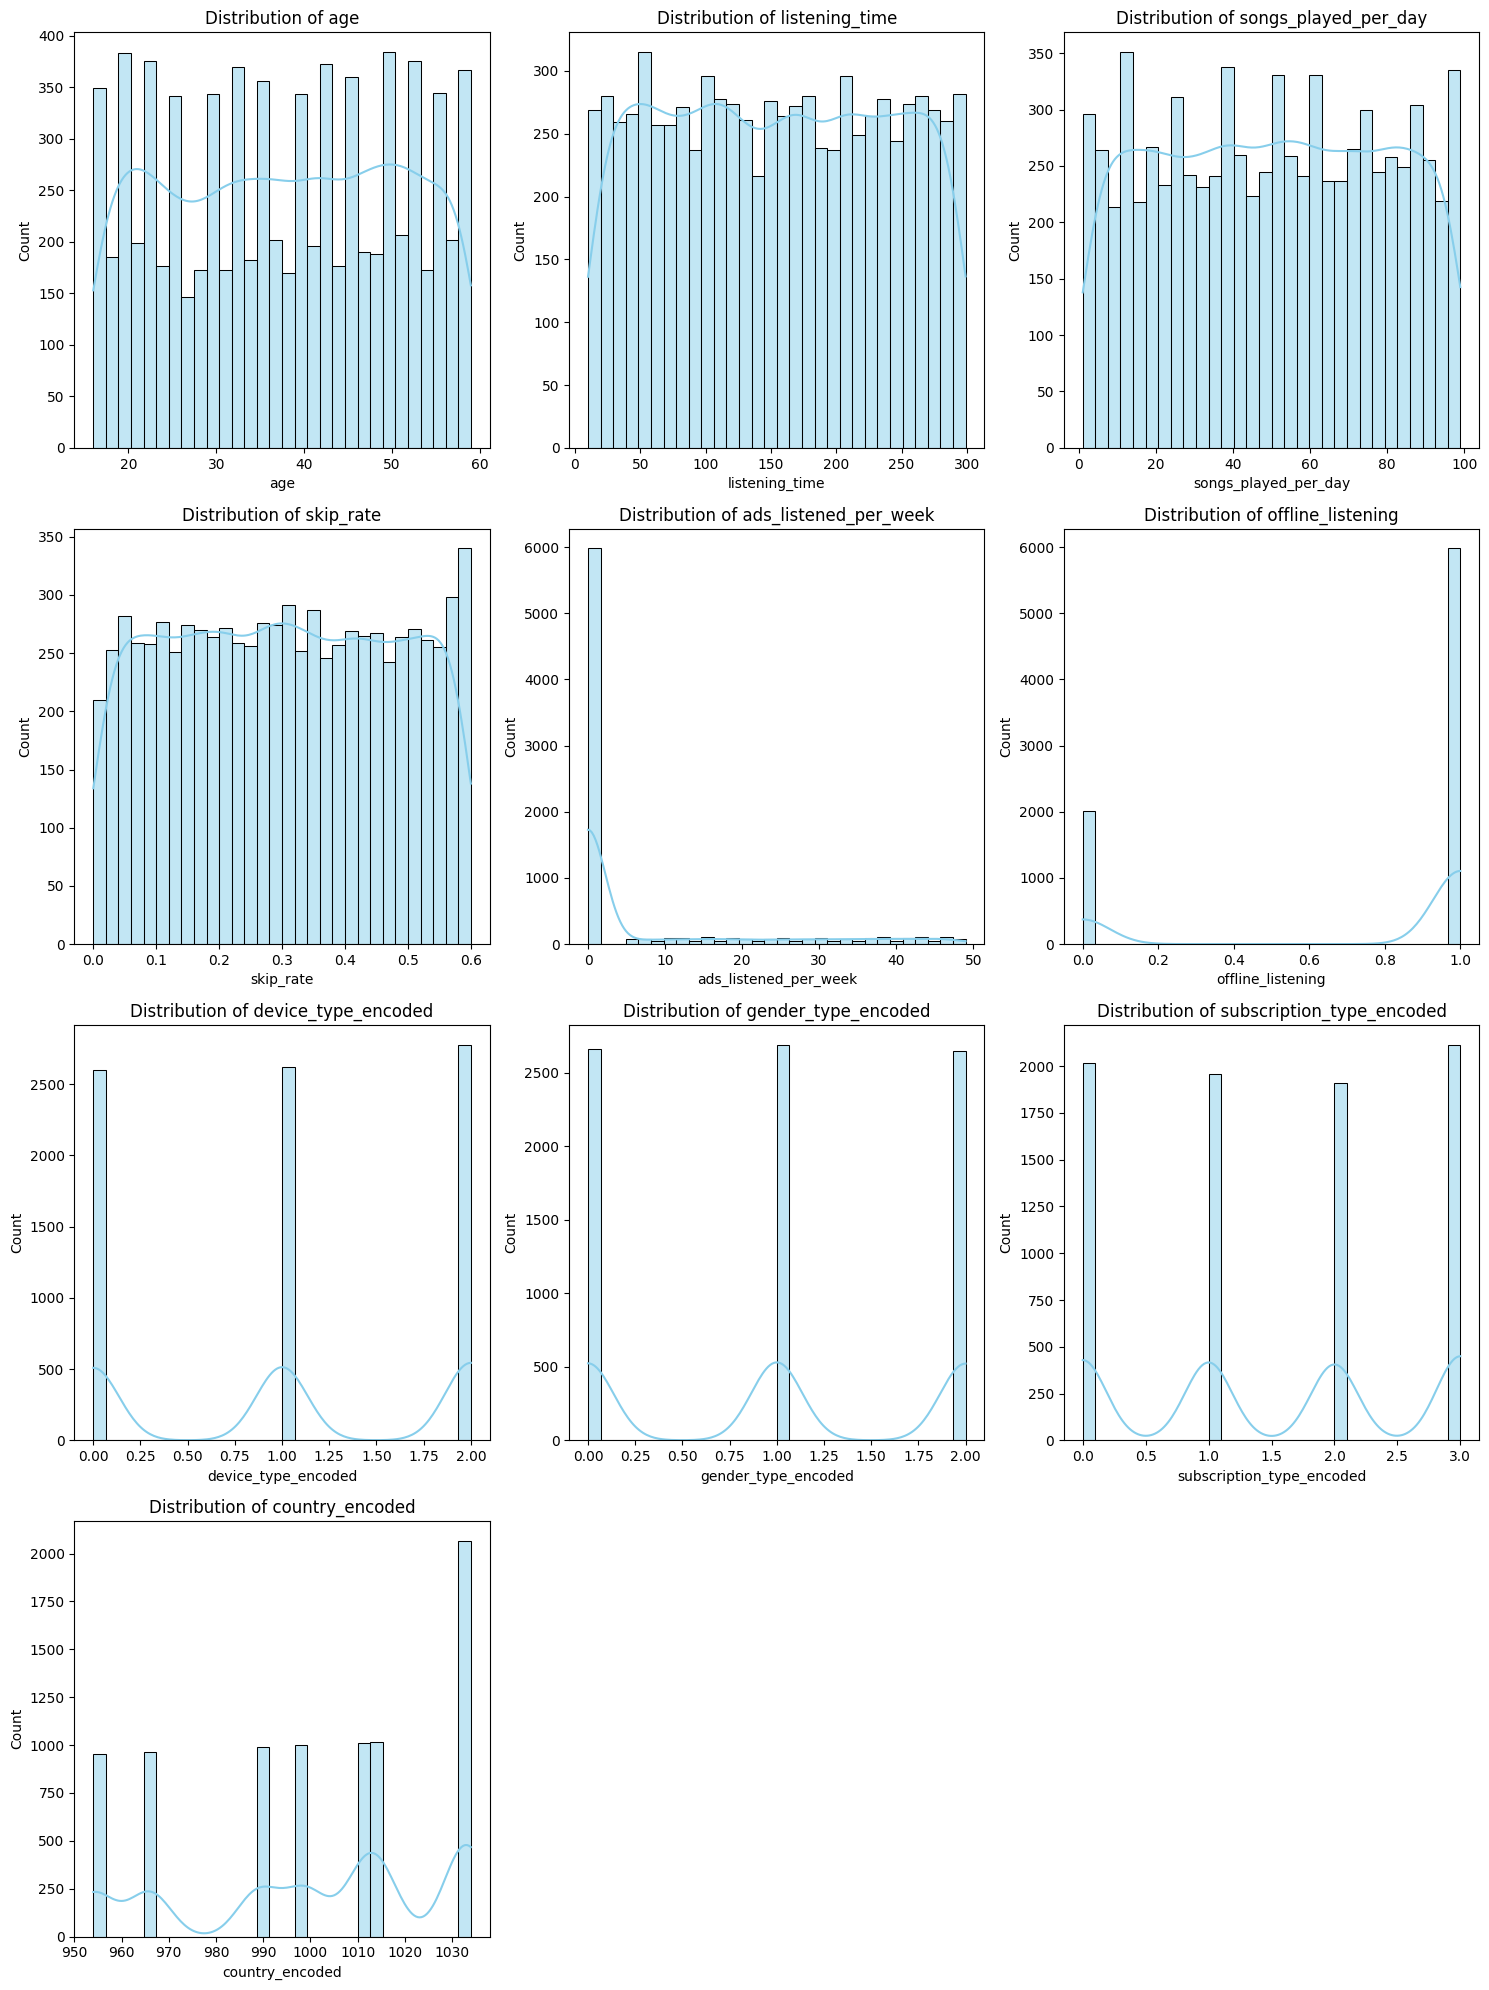

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = [
    'age', 'listening_time', 'songs_played_per_day', 'skip_rate',
    'ads_listened_per_week', 'offline_listening', 'device_type_encoded',
    'gender_type_encoded', 'subscription_type_encoded', 'country_encoded'
]

# Hitung layout grid
n_cols = 3   # jumlah kolom subplot
n_rows = math.ceil(len(numerical_cols) / n_cols)  # jumlah baris sesuai kebutuhan

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Comparing listening_time between churned and non-churned

C:\Users\RIZKI MAULA\AppData\Local\Temp\ipykernel_12368\184072167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_churned', y='listening_time', data=df, palette='Set2')


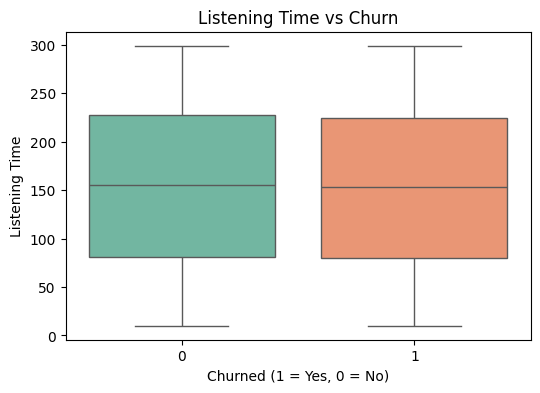

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_churned', y='listening_time', data=df, palette='Set2')
plt.title("Listening Time vs Churn")
plt.xlabel("Churned (1 = Yes, 0 = No)")
plt.ylabel("Listening Time")
plt.show()

Listening time didn't show a significant difference between churned and non-churned users. This indicates that the length of time spent listening to music isn't a major factor in users' decision to unsubscribe.

Check for the correlation between features through heatmap correlation

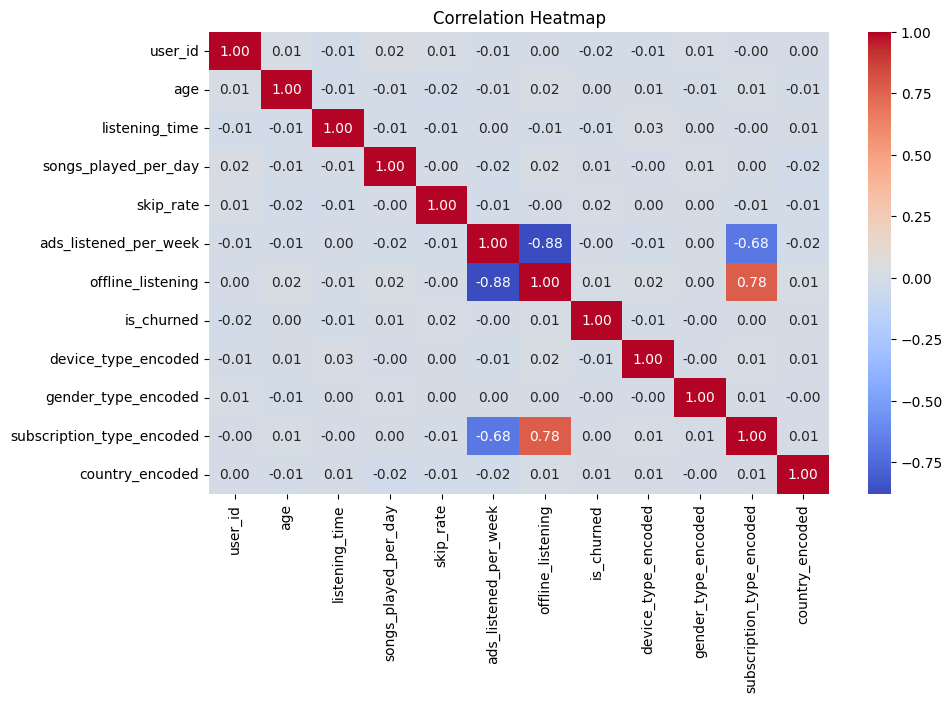

In [17]:
num_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The graph shows features that are positively correlated, negatively correlated, and uncorrelated with churn.
- The feature with a positive correlation is subscription type. This indicates that subscription type significantly influences churn. Furthermore, features with a negative correlation are offline listeners and ads per week.
- The offline listener feature influences churn; the more frequently users use offline listening, the lower the likelihood of churn. Furthermore, the ads per week feature shows that the more ads heard per week, the lower the likelihood of churn. This indicates that users who still listen to ads are actively using the app, even though it's still the free version.
- Features with a weak correlation with churn include age, music listening time, number of songs per day, and skip rate.
- The graph also shows multicollinearity between offline listeners and ads per week, indicating that offline listeners (premium users) hear almost no ads.

Observing the distribution of churn by gender

C:\Users\RIZKI MAULA\AppData\Local\Temp\ipykernel_12368\3885205311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender_type_encoded', y='is_churned', data=df, estimator=lambda x: sum(x)/len(x), palette='Set2')


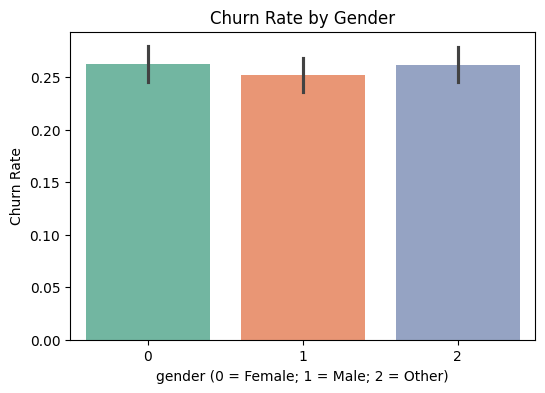

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender_type_encoded', y='is_churned', data=df, estimator=lambda x: sum(x)/len(x), palette='Set2')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.xlabel("gender (0 = Female; 1 = Male; 2 = Other)")
plt.show()

The graph shows that the difference in churn rates between genders is relatively small, indicating that gender is not a dominant factor in determining churn.

Observing the distribution of churn by subscription type

C:\Users\RIZKI MAULA\AppData\Local\Temp\ipykernel_12368\4010364596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscription_type', y='is_churned', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')


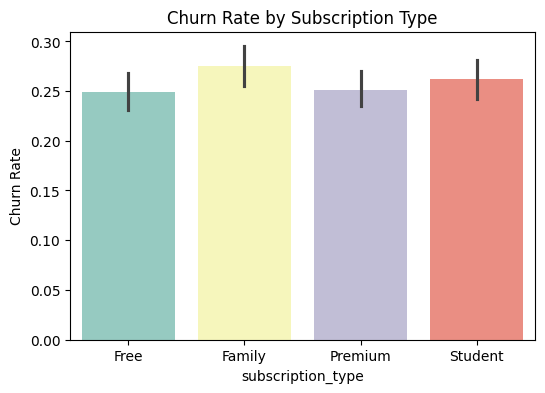

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='subscription_type', y='is_churned', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')
plt.title("Churn Rate by Subscription Type")
plt.ylabel("Churn Rate"
plt.show()

The graph above shows that the churn rate between subscription types is not significantly different, indicating that this feature is not the sole determinant of churn. The graph also shows that the family subscription category has the highest churn rate. This could be due to the loss of many users when the family subscription is terminated and the possibility of services or pricing that are less than ideal for consumers.

Observing churn distribution by device type

C:\Users\RIZKI MAULA\AppData\Local\Temp\ipykernel_12368\665600912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='is_churned', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')


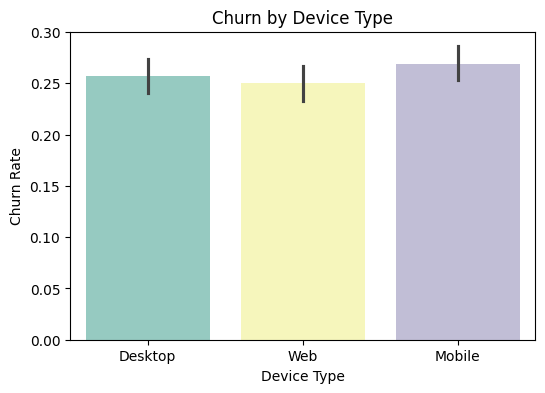

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x='device_type', y='is_churned', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')
plt.title("Churn by Device Type")
plt.ylabel("Churn Rate")
plt.xlabel("Device Type")
plt.show()

In the graph above, it can be observed that of the three types of devices used, mobile is the device with the highest chun rate.

Observing the distribution of churn based on the 10 countries with the highest users

C:\Users\RIZKI MAULA\AppData\Local\Temp\ipykernel_12368\1176271031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='is_churned', data=df_top10, estimator=lambda x: sum(x)/len(x), palette='Set3', order=top10_countries)


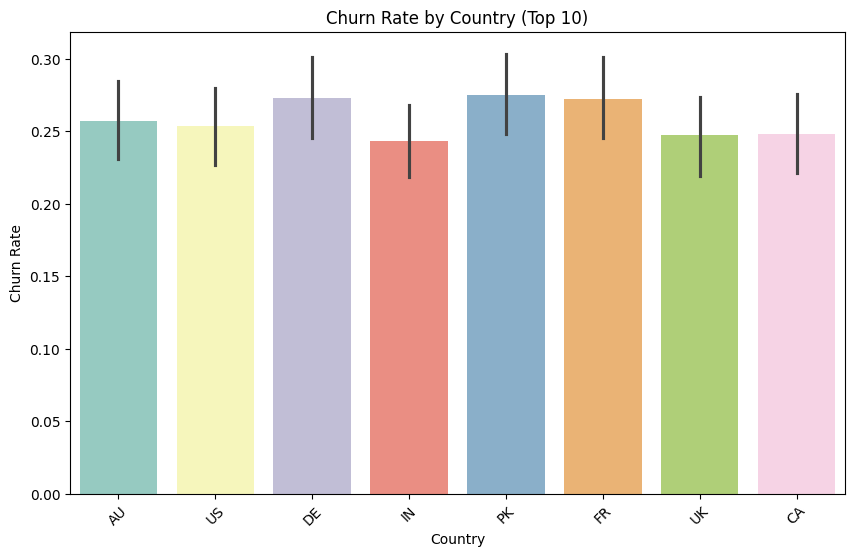

In [26]:
top10_countries = df['country'].value_counts().head(10).index
df_top10 = df[df['country'].isin(top10_countries)]

plt.figure(figsize=(10,6))
sns.barplot(x='country', y='is_churned', data=df_top10, estimator=lambda x: sum(x)/len(x), palette='Set3', order=top10_countries)
plt.title("Churn Rate by Country (Top 10)")
plt.ylabel("Churn Rate")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

The graph above shows the churn rate in the 10 countries with the most users. The graph shows that Germany (DE), Pakistan (PK), and France (FR) have the highest churn rates. In countries with higher churn rates, this can be influenced by factors such as price, purchasing power, competition from streaming services, or user preferences. India (IN), the United Kingdom (UK), and Canada (CA) have the lowest.

## 5. Conclusion

This analysis revealed a churn rate of 25.89% among 8,000 users worldwide. This is significant and could impact the company's revenue from subscription features. Furthermore, user churn behavior is influenced by several factors, such as subscription type, which has a positive correlation (0.78) and offline listeners, which has a negative correlation (-0.68). The analysis revealed that family subscription users have the highest churn rate compared to other subscription types. Furthermore, mobile users are the device with the highest churn rate. Furthermore, based on country, Germany (DE), Pakistan (PK), and France (FR) have the highest churn rates.

## 6. Recommendation

Recommendations based on the conclusions above:
- Improve offline features to reduce churn.
- Evaluate Family Plan pricing and benefits.
- Focus retention strategies on mobile users (e.g., more user-friendly UX/ads).
- Adjust local strategies in countries with high churn.